# How has In-N-Out grown over the decades?

#### Python tools

In [1]:
import pandas as pd
import altair as alt
import altair_stiles as altstiles
import circlify
import squarify
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

In [3]:
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("stiles")

ThemeRegistry.enable('grid')

---

## Read data

#### Get locations and set data types on import

In [4]:
df = pd.read_csv('data/processed/locations.csv', parse_dates=['opened_date'], dtype={'opened_year':str, 'storenumber':str, 'zipcode':str})

In [5]:
df.head()

,storenumber,name,streetaddress,city,state,zipcode,latitude,longitude,distance,imageurlthumb,opened_date,opened_year
0,140,Culver City,13425 Washington Blvd.,Marina Del Rey,CA,90292,33.99165,-118.44626,0.82,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/140.jpg,1999-10-28,1999
1,117,Westchester,9149 S. Sepulveda Blvd.,Los Angeles,CA,90045,33.95369,-118.39677,3.08,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/117.jpg,1997-01-22,1997
2,55,West Los Angeles,9245 W. Venice Blvd.,Los Angeles,CA,90034,34.02646,-118.39427,3.60,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/55.jpg,1989-09-06,1989
3,309,El Segundo,600 N. Sepulveda Blvd.,El Segundo,CA,90245,33.92387,-118.39582,4.81,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/309.jpg,2015-12-30,2015
4,119,Westwood,922 Gayley,Los Angeles,CA,90024,34.06306,-118.44803,5.39,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/119.jpg,1997-04-01,1997


---

## Aggregate

#### How many are in each state? 

In [6]:
df.state.value_counts()

CA    261
TX     40
AZ     34
NV     22
UT     11
CO      7
OR      3
Name: state, dtype: int64

#### Locations by year

In [7]:
years = df.groupby(['opened_year']).agg({'storenumber':'count'}).reset_index().rename(columns={'storenumber':'count'})

In [8]:
years['cumsum'] = years['count'].cumsum()

#### States

In [9]:
states = df.groupby(['state']).agg({'storenumber':'count'}).reset_index().rename(columns={'storenumber':'count'}).sort_values('count', ascending=False)

In [10]:
states

,state,count
1,CA,261
5,TX,40
0,AZ,34
3,NV,22
6,UT,11
2,CO,7
4,OR,3


#### Years and states

In [11]:
year_state = df.groupby(['opened_year', 'state']).agg({'storenumber':'count'}).reset_index().rename(columns={'storenumber':'count'})

In [12]:
year_state.head()

,opened_year,state,count
0,1948,CA,1
1,1951,CA,1
2,1952,CA,1
3,1959,CA,1
4,1962,CA,1


----

## Charts

In [13]:
line = (
    alt.Chart(years)
    .mark_bar()
    .encode(
        x=alt.X("opened_year:T", title="", axis=alt.Axis(tickCount=6)),
        y=alt.Y("count", title=" ", axis=alt.Axis(tickCount=4)),
    )
)
line.properties(
    width=650, height=350, title="In-N-Out locatins opened, by year"
)

alt.Chart(...)

In [14]:
cum_line = (
    alt.Chart(years)
    .mark_line()
    .encode(
        x=alt.X("opened_year:T", title="", axis=alt.Axis(tickCount=6)),
        y=alt.Y("cumsum", title=" ", axis=alt.Axis(tickCount=6)),
    )
)
cum_line.properties(
    width=650, height=350, title="In-N-Out locations cumulative growth"
)

alt.Chart(...)

#### Plot the state counts as bubbles

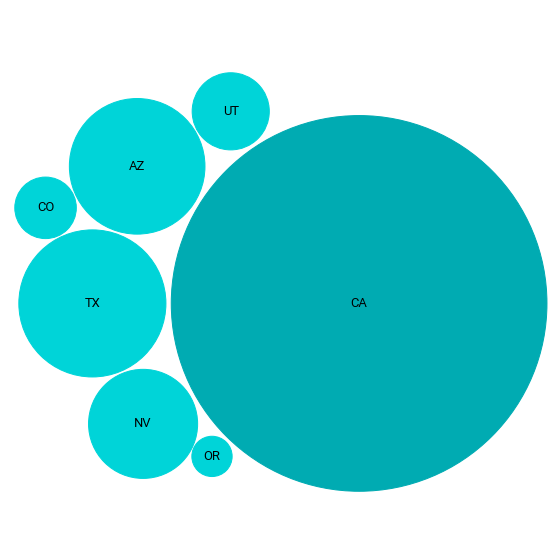

In [15]:
# font from OS
hfont = {'fontname':'Roboto'}

states = states.sort_values('count')
circles = circlify.circlify(states['count'].tolist(),
                            show_enclosure=False,
                            target_enclosure=circlify.Circle(x=0, y=0, r=1))
labels = states['state'].tolist()

fig, ax = plt.subplots(figsize=(10, 10))

ax.axis('off')
ax.set_aspect('equal')

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r, )
          for circle in circles)

ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

# for circle, label in zip(circles, labels):
#     x, y, r = circle
#     ax.add_patch(plt.Circle((x, y), r*0.98, alpha=0.9, linewidth=1, facecolor="#00d4d8", edgecolor="#00abb2"))
#     plt.annotate(label, (x,y ) ,va='center', ha='center', **hfont, fontsize=13)

colors = ['#00abb2' if val == states['count'].max() else '#00d4d8' for val in states['count']]

for circle, label, color in zip(circles, labels, colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r*0.98, linewidth=1, alpha=1, color=color))
    ax.annotate(label, (x, y), va='center', ha='center', **hfont, fontsize=13)
    
plt.show()

In [16]:
states

,state,count
4,OR,3
2,CO,7
6,UT,11
3,NV,22
0,AZ,34
5,TX,40
1,CA,261


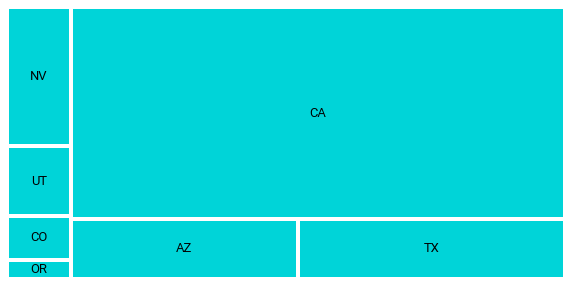

In [17]:
plt.rcParams["font.family"] = "Roboto"

fig, ax = plt.subplots(figsize=(10, 5))
squarify.plot(sizes=states['count'].to_list(), label=states['state'].to_list(), 
              color=["#00d4d8"], edgecolor="white", linewidth=4, alpha=1, text_kwargs={'fontsize':13})
plt.axis('off')
plt.show()